In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('graficas\\2015-NH085-normal\\NH085_Energy.csv')
X = data[['X', 'Y', 'Z', 'Temp']]
data['Energy'] = 1
y = data['Energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [4]:
#Entrada
entrada = keras.Input(shape=(4,))

x = keras.layers.Flatten()(entrada)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
x = keras.layers.Dense(16, activation='sigmoid')(x)
salida = keras.layers.Dense(1, activation='linear')(x)
modelo3 = keras.Model(inputs = entrada, outputs = salida)
modelo3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy','mean_squared_error'])
historial3 = modelo3.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test))
#batch size 
# Primero entrenar la IA metiendo las X y salida será 0 o 1 (nueva entrada que va a guardar esos datos especificos)


Epoch 1/20
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9974 - loss: 0.0039 - mean_squared_error: 0.0039 - val_accuracy: 1.0000 - val_loss: 1.0670e-10 - val_mean_squared_error: 1.0670e-10
Epoch 2/20
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 1.0000 - loss: 3.1045e-05 - mean_squared_error: 3.1045e-05 - val_accuracy: 1.0000 - val_loss: 1.6273e-09 - val_mean_squared_error: 1.6273e-09
Epoch 3/20
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 1.0000 - loss: 3.1477e-05 - mean_squared_error: 3.1477e-05 - val_accuracy: 1.0000 - val_loss: 5.1184e-12 - val_mean_squared_error: 5.1184e-12
Epoch 4/20
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 1.0000 - loss: 4.2469e-05 - mean_squared_error: 4.2469e-05 - val_accuracy: 1.0000 - val_loss: 9.2251e-07 - val_mean_squared_error: 9.2251e-07
Epoch 5/20
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 1.0000 - loss: 2.7041e-05 - mean_squared_error: 2.7041e-05 - val_accuracy: 1.0000 - val_loss: 4.4435e-13 

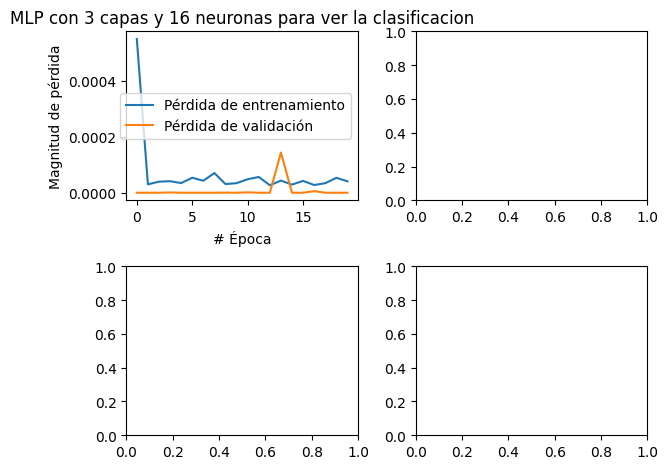

In [5]:
#MLP con 4 capas y varias neuronas
loss3 = historial3.history['loss']
val_loss3 = historial3.history['val_loss']

# Graficar la pérdida de entrenamiento y validación
fig, axs = plt.subplots(2, 2)
axs[0][0].set_title('MLP con 3 capas y 16 neuronas para ver la clasificacion')
axs[0][0].set_xlabel("# Época")
axs[0][0].set_ylabel("Magnitud de pérdida")
axs[0][0].plot(loss3, label='Pérdida de entrenamiento')
axs[0][0].plot(val_loss3, label='Pérdida de validación')
axs[0][0].legend()

fig.tight_layout()
plt.show()

[0.0005498671089299023, 2.9976790756336413e-05, 3.958020533900708e-05, 4.1248877096222714e-05, 3.4545773814897984e-05, 5.364205935620703e-05, 4.2806696001207456e-05, 7.03514160704799e-05, 3.0918046832084656e-05, 3.425475370022468e-05, 4.8291047278326005e-05, 5.629667066386901e-05, 2.6874982722802088e-05, 4.341736712376587e-05, 2.9241491574794054e-05, 4.230370177538134e-05, 2.7545311240828596e-05, 3.413947706576437e-05, 5.34322825842537e-05, 4.089939466211945e-05]


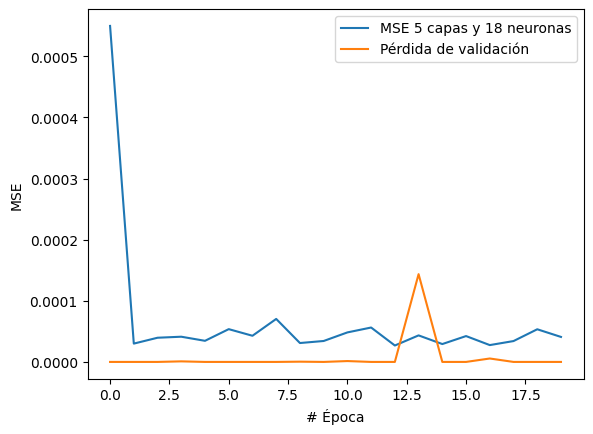

In [6]:
#MLP con 4 capas y varias neuronas
mse3 = historial3.history['mean_squared_error']

plt.xlabel("# Época")
plt.ylabel("MSE")
plt.plot(mse3, label='MSE 5 capas y 18 neuronas')
plt.plot(historial3.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()